#introduction
The Heart Disease Prediction dataset is a widely-used dataset in the field of machine learning and data analysis. It contains medical data of patients, which is used to predict whether an individual has heart disease based on various attributes. The dataset is often used for classification tasks, where the objective is to train a machine learning model that can predict whether a patient has heart disease (often labeled as "1") or not (labeled as "0").

#problem statment
Problem Statement:
The goal is to develop a machine learning model that can predict whether a patient has heart disease based on the features provided in the dataset. This is a binary classification problem, where the model is trained to predict one of two outcomes:

0: No heart disease

1: Heart disease present

#data overview
1.Age: Age of the patient.

2.Sex: Gender of the patient (1 = male, 0 = female).

3.CP: Chest pain type (categorical feature with different types of chest pain).

4.Trestbps: Resting blood pressure (in mm Hg).

5.Chol: Serum cholesterol level (in mg/dl).

6.Fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).

7.Restecg: Resting electrocardiographic results (categorical).

8.Thalach: Maximum heart rate achieved.

9.Exang: Exercise-induced angina (1 = yes, 0 = no).

10.Oldpeak: Depression induced by exercise relative to rest.

11.Slope: Slope of the peak exercise ST segment.

12.Ca: Number of major vessels colored by fluoroscopy.

13.Thal: Thalassemia (a blood disorder) (categorical).

14.Target: Presence or absence of heart disease (0 = no disease, 1 = disease).

Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

#Data loading
data loading is using pandas

In [ ]:
df = pd.read_csv('/content/heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Shape of the Dataset: df.shape

In [ ]:
df.shape

(303, 14)

Descriptive Statistics: df.describe()

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Missing Values : df.isnull().sum()

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#Distribution all features
hist is used to show histogram of each element

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

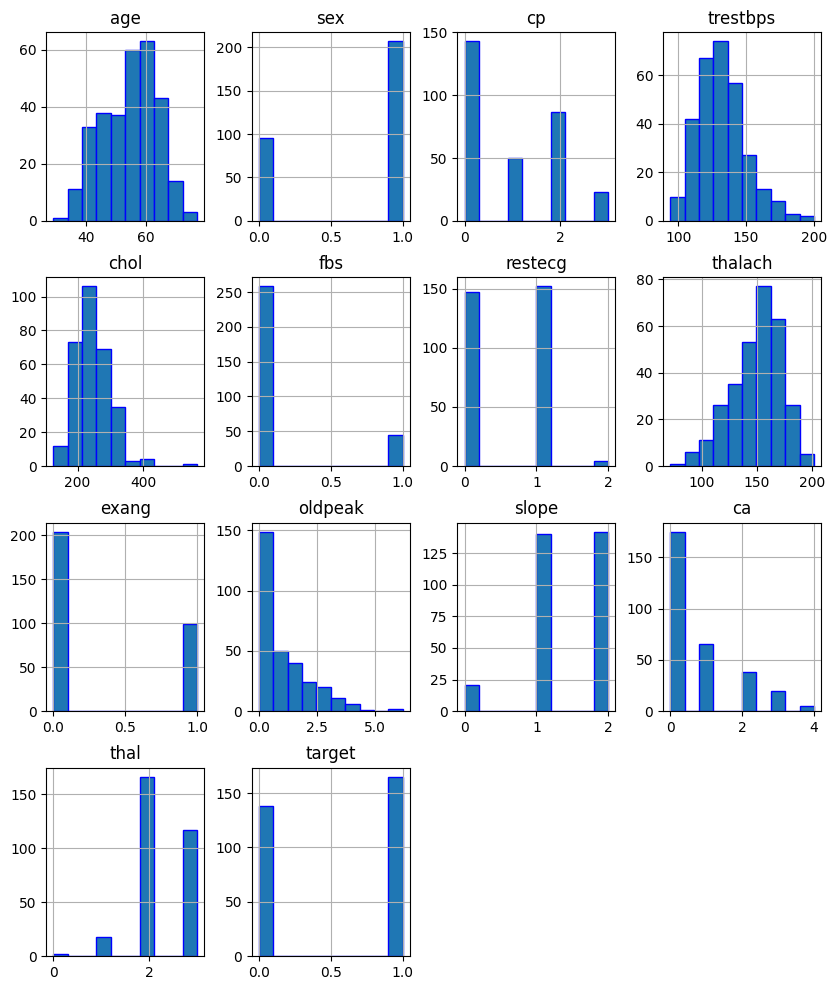

In [ ]:
df.hist(edgecolor="b",figsize=[10,12])

#Correlation Analysis
A heatmap was generated to understand the correlation between different features:

In [ ]:
correlation=df.corr()

In [ ]:
import matplotlib.pyplot as plt

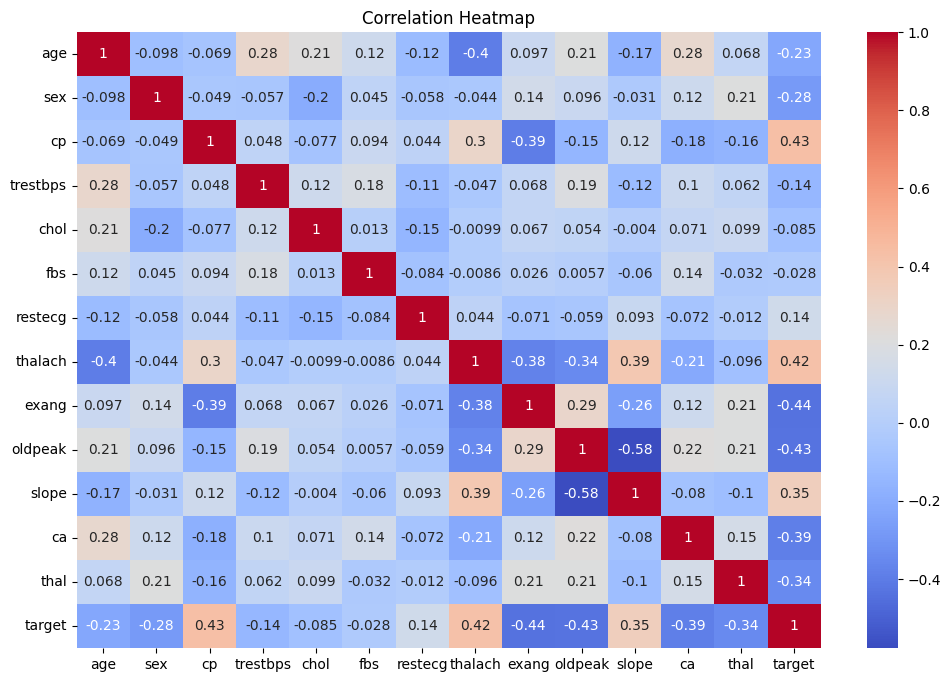

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.corr()['target'].sort_values(ascending=False)

,target
target,1.000000
cp,0.433798
thalach,0.421741
slope,0.345877
restecg,0.137230
fbs,-0.028046
chol,-0.085239
trestbps,-0.144931
age,-0.225439
sex,-0.280937


#Feature Selection
Low-correlation features and those with high skewness were dropped from the dataset:

In [ ]:
df.drop(['age','sex','trestbps','chol','fbs','restecg'],axis=1,inplace=True)

In [ ]:
df.shape

(303, 8)

<Axes: xlabel='target', ylabel='count'>

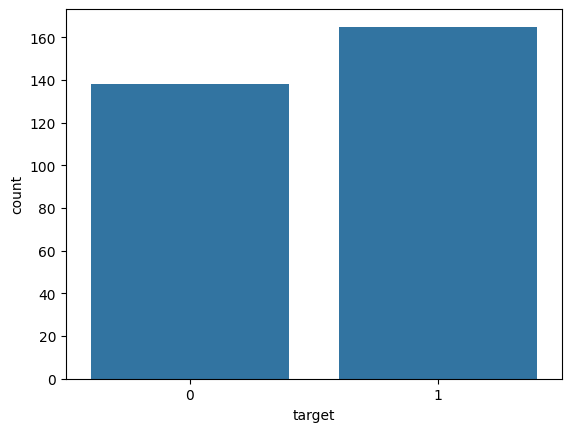

In [ ]:
sns.countplot(x='target',data=df)

#Data Transformation
Log transformation was applied to reduce skewness in the data:

           cp   thalach     exang   oldpeak     slope        ca      thal  \
0    1.386294  5.017280  0.000000  1.193922  0.000000  0.000000  0.693147   
1    1.098612  5.236442  0.000000  1.504077  0.000000  0.000000  1.098612   
2    0.693147  5.153292  0.000000  0.875469  1.098612  0.000000  1.098612   
3    0.693147  5.187386  0.000000  0.587787  1.098612  0.000000  1.098612   
4    0.000000  5.099866  0.693147  0.470004  1.098612  0.000000  1.098612   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.000000  4.820282  0.693147  0.182322  0.693147  0.000000  1.386294   
299  1.386294  4.890349  0.000000  0.788457  0.693147  0.000000  1.386294   
300  0.000000  4.955827  0.000000  1.481605  0.693147  1.098612  1.386294   
301  0.000000  4.753590  0.693147  0.788457  0.693147  0.693147  1.386294   
302  0.693147  5.164786  0.000000  0.000000  0.693147  0.693147  1.098612   

       target  
0    0.693147  
1    0.693147  
2    0.693147  
3    0.6931

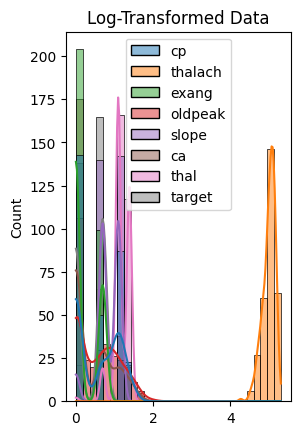

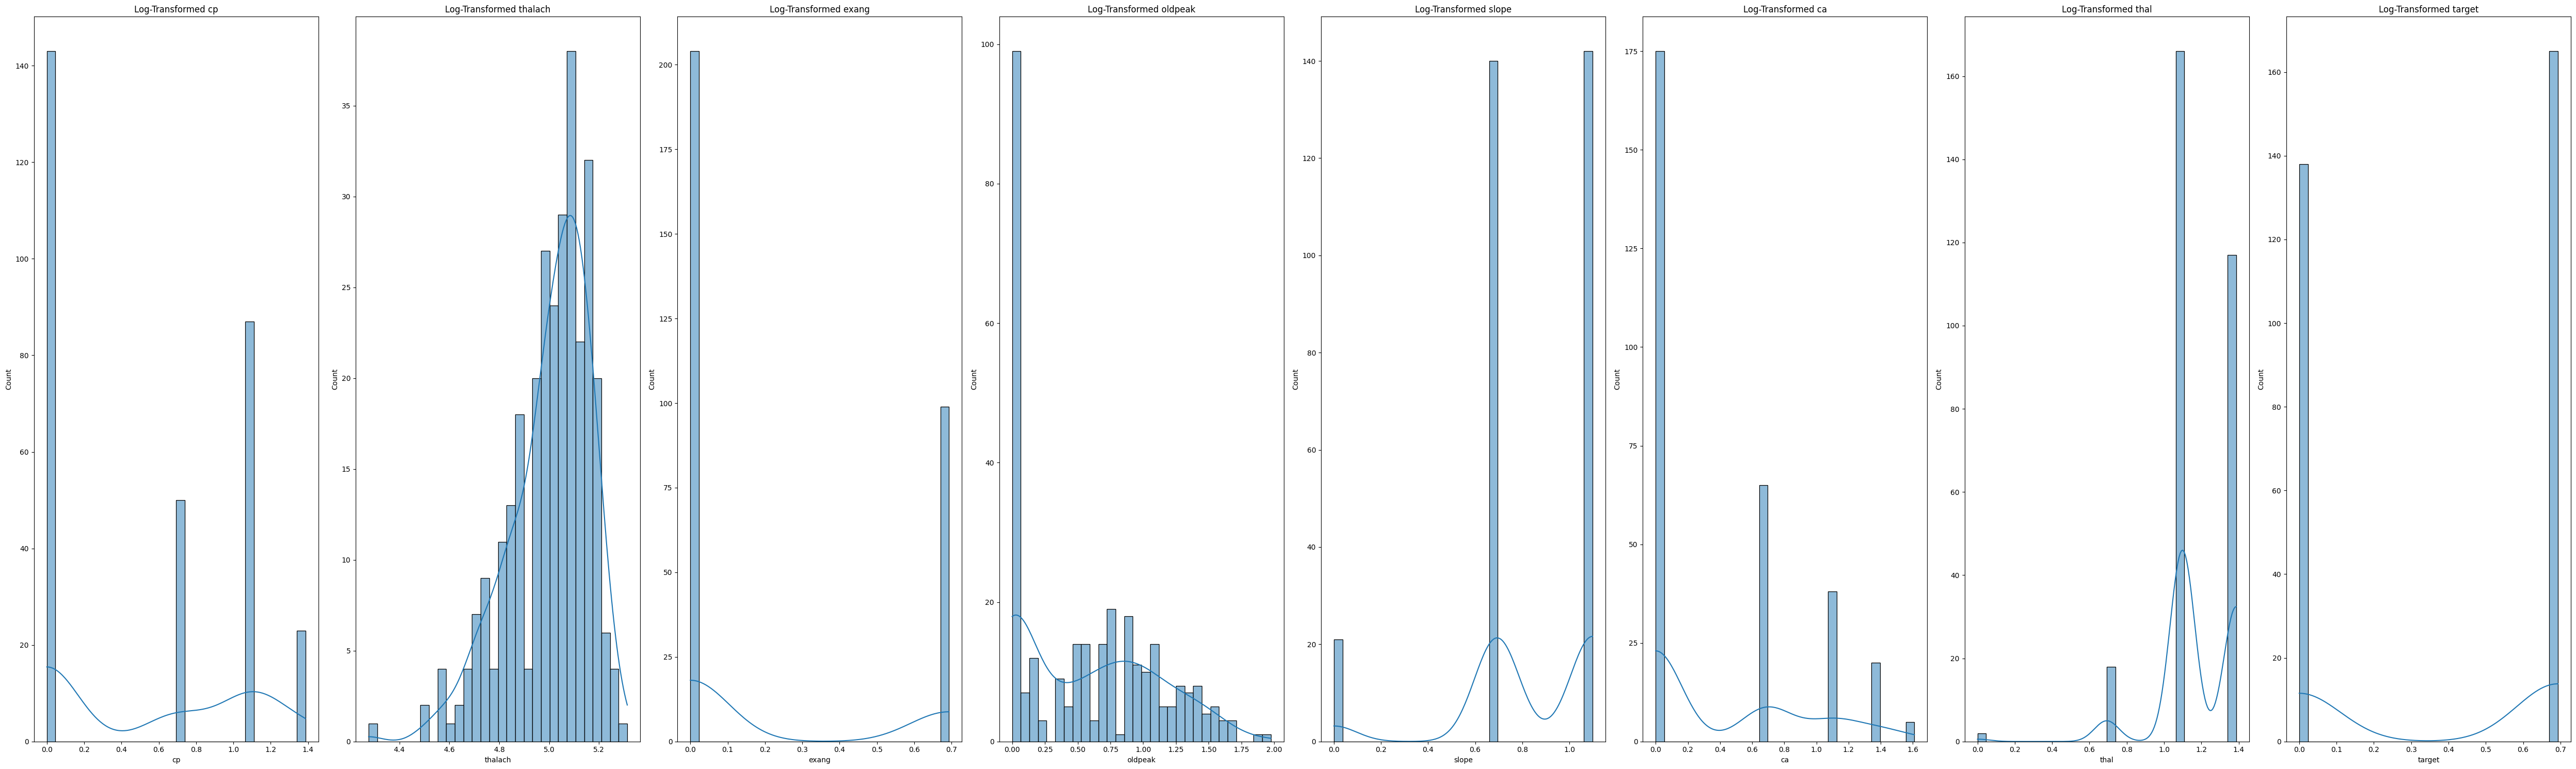

In [ ]:
log_data=np.log(df+1)
print(log_data)
# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming df is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
log_data['target'] = (log_data['target'] > 0.5).astype(int)
x=log_data[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=log_data['target']

#Splitting the Data
The data was split into training and testing sets




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#Model Training
Random Forest Classifier is trained with default parameters

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#Prediction
Allows users to input clinical data interactively for real-time prediction

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

A confusion matrix is a performance measurement tool used in classification problems to evaluate the effectiveness of a classification algorithm. It compares the actual labels (true values) of a dataset against the predicted labels from the model. The matrix provides a breakdown of how well the model performs in distinguishing between different classes.

#Why Do We Use a Confusion Matrix?
#A confusion matrix is useful for several reasons:
1.Model Performance Analysis.

2.Key Metrics Calculation: From the confusion matrix, you can derive various metrics to evaluate model performance.

3.Class Imbalance.

4.Diagnosing Model Issues.


In [ ]:
print("confusion matrix",confusion_matrix(y_test,y_pred))


confusion matrix [[25  4]
 [ 4 28]]


Accuracy: The proportion of correct predictions (both true positives and true negatives) out of all predictions.

Precision: The ratio of true positive predictions to the total number of positive predictions made by the model. A weighted average accounts for class imbalance.

Recall: The ratio of true positive predictions to the total number of actual positives in the data. A weighted average adjusts for class imbalance.

F1 Score: The harmonic mean of precision and recall. It balances precision and recall and is also computed as a weighted average when using imbalanced classes.

accuracy: The proportion of total predictions that were correct.

Precision: The proportion of positive predictions that were actually correct.

Recall (Sensitivity or True Positive Rate): The proportion of actual positives that were correctly identified.

F1 Score: The harmonic mean of precision and recall, useful when you need to balance both.

Specificity (True Negative Rate): The proportion of actual negatives that were correctly identified.

In [ ]:
print("accuracy:",accuracy_score(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred, average = "weighted"))
print("recall:",recall_score(y_test,y_pred, average = "weighted"))
print("f1 score:",f1_score(y_test,y_pred, average = "weighted"))

accuracy: 0.8688524590163934
precision: 0.8688524590163934
recall: 0.8688524590163934
f1 score: 0.8688524590163934


In [ ]:
log_data

,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,1.386294,5.017280,0.000000,1.193922,0.000000,0.000000,0.693147,1
1,1.098612,5.236442,0.000000,1.504077,0.000000,0.000000,1.098612,1
2,0.693147,5.153292,0.000000,0.875469,1.098612,0.000000,1.098612,1
3,0.693147,5.187386,0.000000,0.587787,1.098612,0.000000,1.098612,1
4,0.000000,5.099866,0.693147,0.470004,1.098612,0.000000,1.098612,1
...,...,...,...,...,...,...,...,...
298,0.000000,4.820282,0.693147,0.182322,0.693147,0.000000,1.386294,0
299,1.386294,4.890349,0.000000,0.788457,0.693147,0.000000,1.386294,0
300,0.000000,4.955827,0.000000,1.481605,0.693147,1.098612,1.386294,0
301,0.000000,4.753590,0.693147,0.788457,0.693147,0.693147,1.386294,0


In [ ]:
cp=float(input("Enter cp:"))
thalach=float(input("Enter thalach:"))
exang=float(input("Enter exang:"))
oldpeak=float(input("Enter oldpeak:"))
slope=float(input("Enter slope:"))
ca=float(input("Enter ca:"))
thal=float(input("Enter thal:"))
user_input = [[cp,thalach,exang,oldpeak,slope,ca,thal]]
heart = model.predict(user_input)
print("heart: ",heart)

Enter cp:36
Enter thalach:01
Enter exang:0
Enter oldpeak:19
Enter slope:0
Enter ca:0
Enter thal:69
heart:  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
